In [63]:
import os
import cv2
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from config import YamlConfigReader
%pwd

'/home/ruslan/src/IndustrialMotionDetection'

In [ ]:
%cd ..
%pwd

'/home/ruslan/src/IndustrialMotionDetection'

In [58]:
conf_file_path = 'conf/meva_preproc.yaml'

In [59]:
config_source = YamlConfigReader(conf_file_path)
params = config_source.get_all()
params

{'annotations_csv': 'data/MEVA/meva_processed/annotations.csv',
 'annotations_folder': 'data/MEVA/meva-data-repo/annotation/DIVA-phase-2/MEVA/kitware-meva-training',
 'bbox_area_limit': 10000,
 'display_annotations': False,
 'padding_frames': 30,
 'result_folder': 'data/MEVA/meva_processed',
 'split_seed': 42,
 'target_activities': ['person_talks_on_phone',
  'person_texts_on_phone',
  'person_picks_up_object',
  'person_reads_document',
  'person_interacts_with_laptop'],
 'test_size': 0.2,
 'videos_root': 'data/MEVA/mevadata-public-01/drops-123-r13'}

In [60]:
annot_df_path = params['annotations_csv']
if not os.path.exists(annot_df_path):
    print('MEVA annotations.csv file not exist')
annot_df_path

'data/MEVA/meva_processed/annotations.csv'

In [64]:
annot_df = pd.read_csv(annot_df_path)
annot_df.head()

video_path  keyframe_id  track_id  \
0  data/MEVA/meva_processed/2018-03-11/12/2018-03...           60         3   
1  data/MEVA/meva_processed/2018-03-11/12/2018-03...           61         3   
2  data/MEVA/meva_processed/2018-03-11/12/2018-03...           62         3   
3  data/MEVA/meva_processed/2018-03-11/12/2018-03...           63         3   
4  data/MEVA/meva_processed/2018-03-11/12/2018-03...           64         3   

         action_category  xmin  ymin  xmax  ymax  
0  person_talks_on_phone   940   947  1337  1071  
1  person_talks_on_phone   937   945  1335  1071  
2  person_talks_on_phone   934   943  1332  1071  
3  person_talks_on_phone   931   941  1330  1071  
4  person_talks_on_phone   928   939  1327  1071

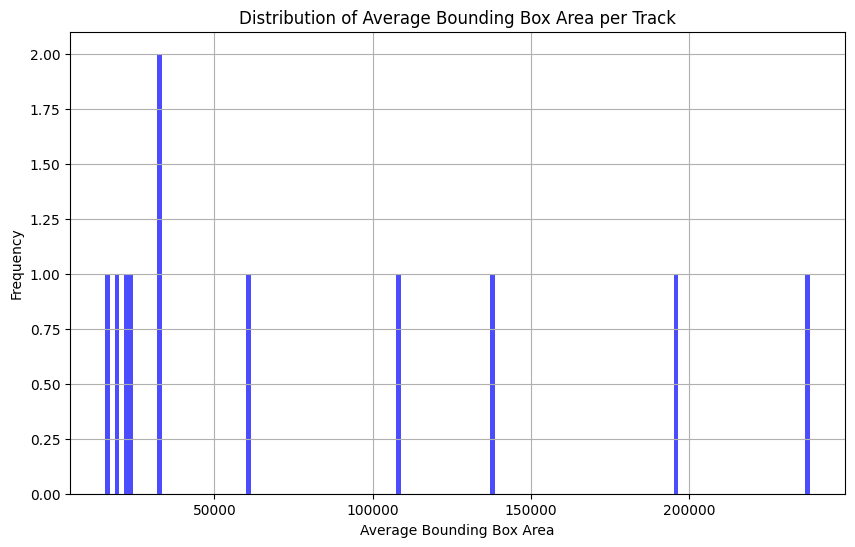

In [65]:
def plot_bbox_area_distribution(annotations_df: pd.DataFrame):
    """
    Plot the distribution of average bounding box area per track.
    """
    annotations_df['bbox_area'] = (annotations_df['xmax'] - annotations_df['xmin']) * (annotations_df['ymax'] - annotations_df['ymin'])

    avg_bbox_area_per_track = annotations_df.groupby(['video_path', 'track_id'])['bbox_area'].mean()

    plt.figure(figsize=(10, 6))
    plt.hist(avg_bbox_area_per_track, bins=150, color='blue', alpha=0.7)
    plt.title('Distribution of Average Bounding Box Area per Track')
    plt.xlabel('Average Bounding Box Area')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
plot_bbox_area_distribution(annot_df)

In [66]:
unique_tracks_per_category = (
    annot_df.groupby(['video_path', 'track_id', 'action_category'])
    .size()
    .groupby('action_category')
    .size()
    .reset_index(name='unique_tracks')
)
unique_tracks_per_category

action_category  unique_tracks
0  person_picks_up_object              4
1   person_reads_document              2
2   person_talks_on_phone              3
3   person_texts_on_phone              2

In [67]:
unique_frames_per_category = (
    annot_df.groupby(['video_path', 'keyframe_id', 'track_id', 'action_category'])
    .size()
    .groupby('action_category')
    .size()
    .reset_index(name='unique_frames')
)
unique_frames_per_category

action_category  unique_frames
0  person_picks_up_object            112
1   person_reads_document           1673
2   person_talks_on_phone            541
3   person_texts_on_phone            321

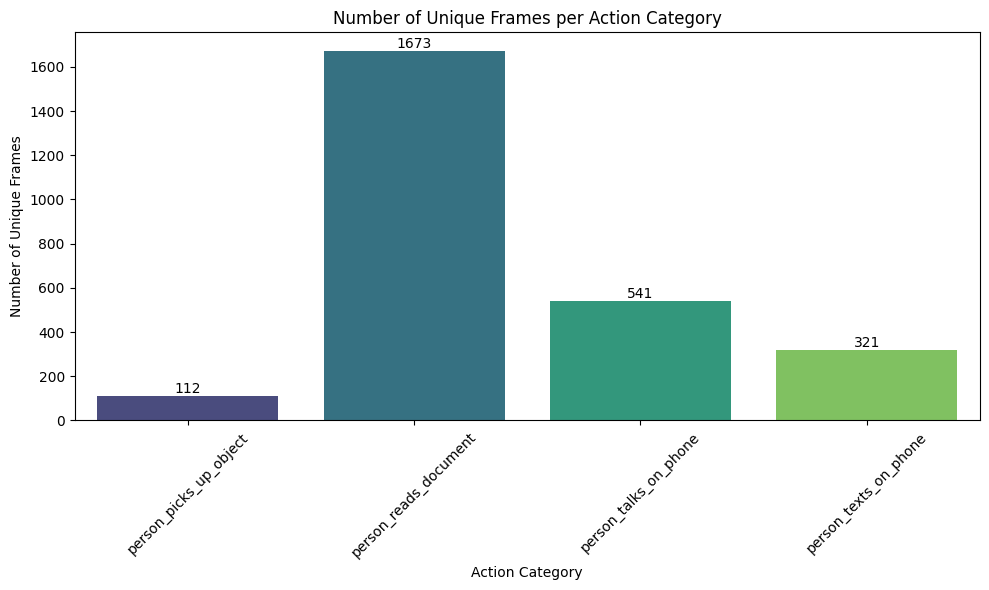

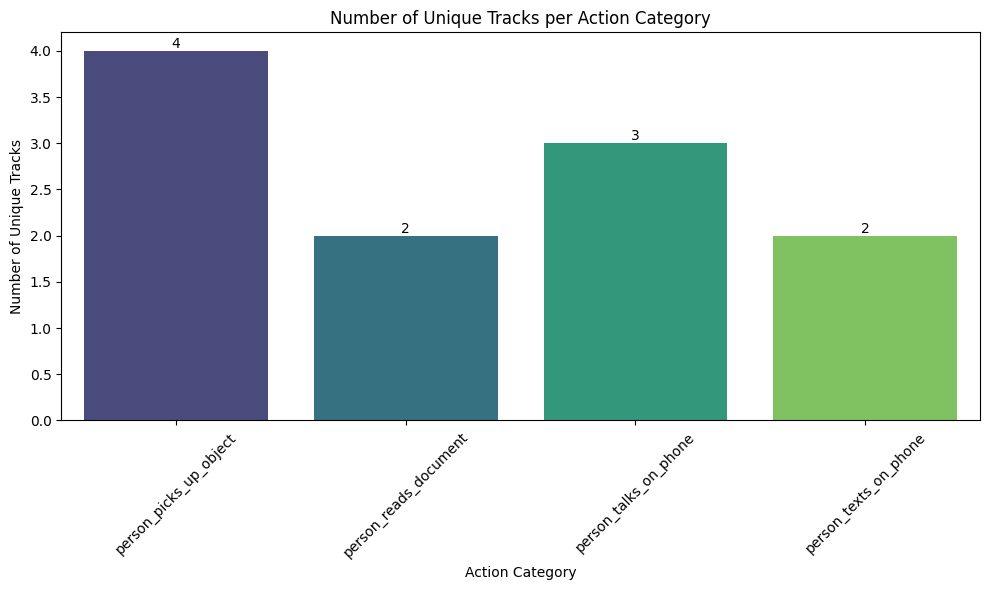

In [68]:
def plot_category_counts(data, y_col, title, y_label, palette='viridis'):
    """
    Plots a bar chart for action category counts with annotations.
    
    Args:
        data (pd.DataFrame): DataFrame containing 'action_category' and count column
        y_col (str): Name of the column to plot on y-axis (e.g., 'unique_frames')
        title (str): Plot title
        y_label (str): Y-axis label
        palette (str): Color palette for the plot
    """
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='action_category', y=y_col, hue='action_category', 
                    data=data, palette=palette, legend=False)
    plt.title(title)
    plt.xlabel('Action Category')
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    
    for index, row in data.iterrows():
        ax.text(index, row[y_col], f"{row[y_col]}", 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

plot_category_counts(
    data=unique_frames_per_category, 
    y_col='unique_frames',
    title='Number of Unique Frames per Action Category',
    y_label='Number of Unique Frames')

plot_category_counts(
    data=unique_tracks_per_category, 
    y_col='unique_tracks',
    title='Number of Unique Tracks per Action Category',
    y_label='Number of Unique Tracks')

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange4863-5587.avi, Frame: 60, Bbox Area: 12382.00


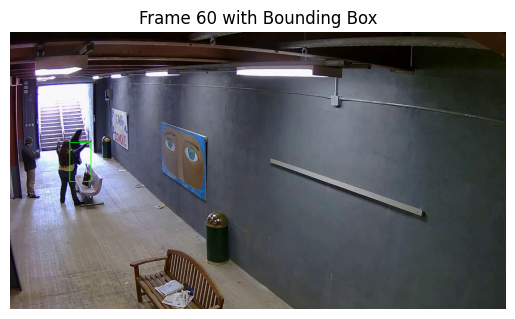

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange4863-5587.avi, Frame: 279, Bbox Area: 18040.00


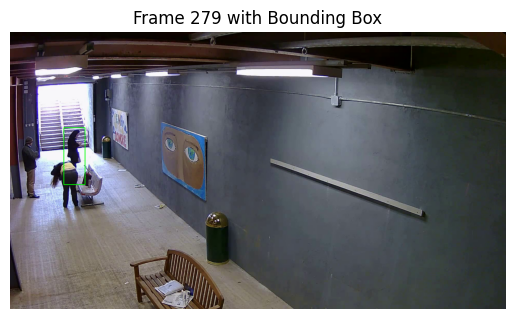

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange4863-5587.avi, Frame: 293, Bbox Area: 18260.00


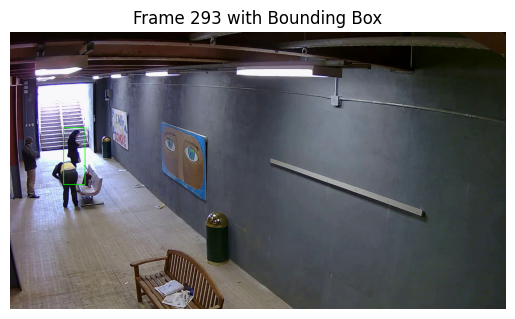

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange4863-5587.avi, Frame: 459, Bbox Area: 18576.00


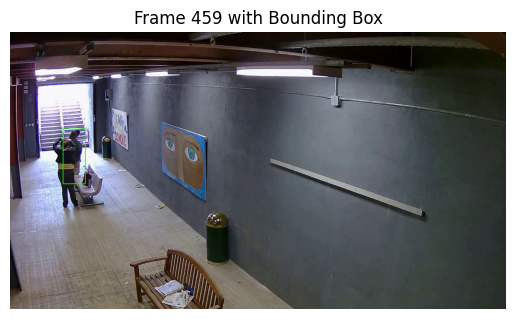

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange4863-5587.avi, Frame: 582, Bbox Area: 19800.00


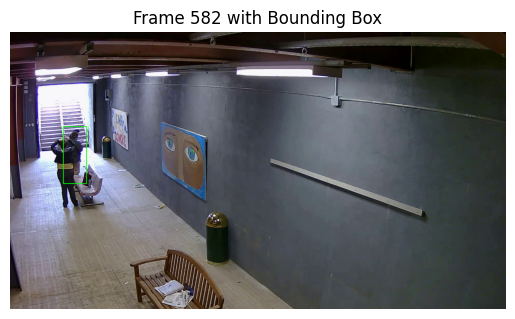

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 142, Bbox Area: 20655.00


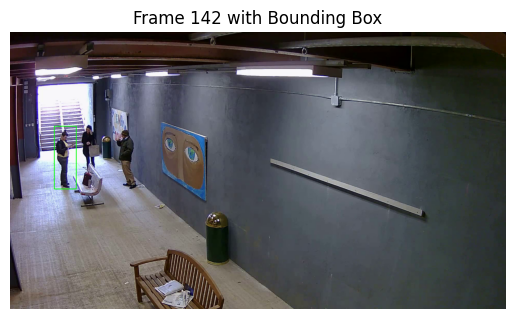

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 254, Bbox Area: 21228.00


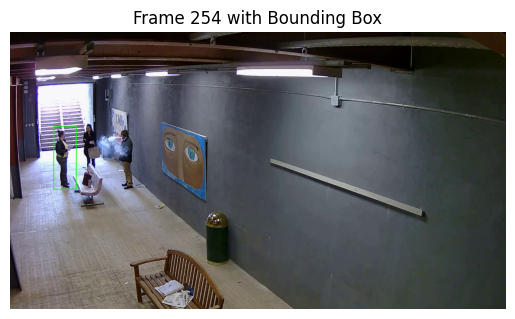

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 376, Bbox Area: 21472.00


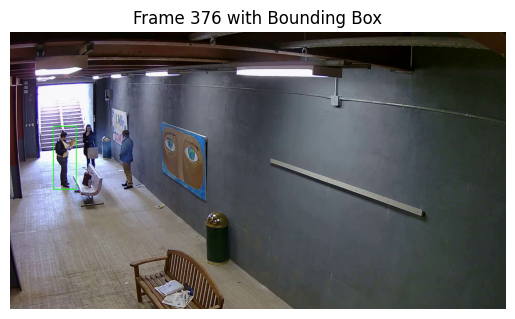

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 456, Bbox Area: 21716.00


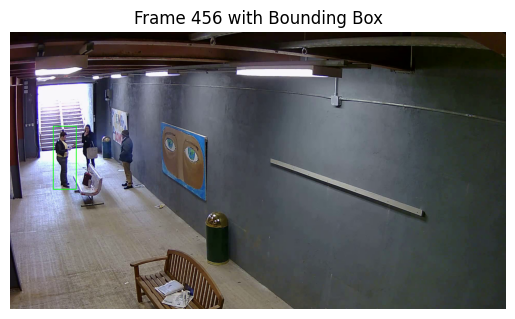

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 600, Bbox Area: 21960.00


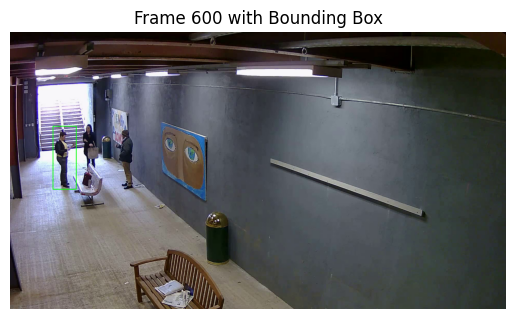

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 104, Bbox Area: 22295.00


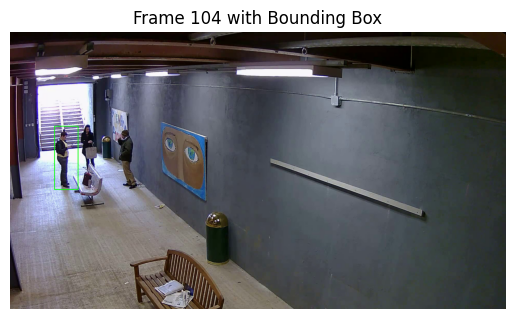

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 899, Bbox Area: 22878.00


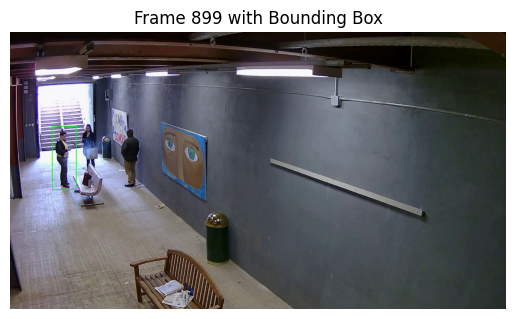

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 1000, Bbox Area: 23312.00


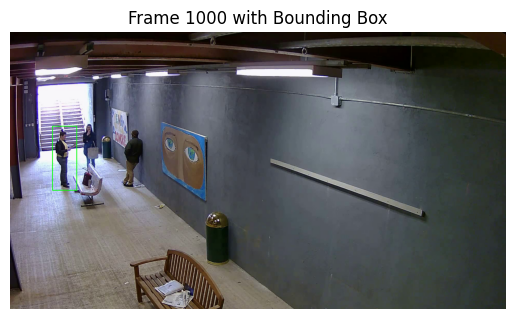

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-00.bus.G508_frange5772-6873.avi, Frame: 83, Bbox Area: 23959.00


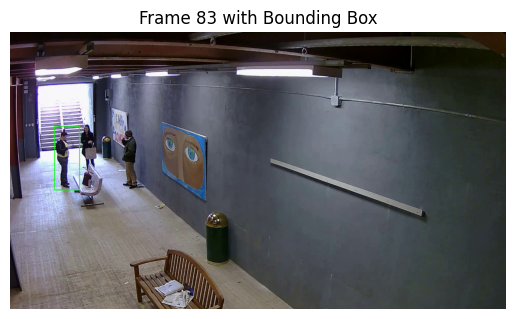

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-01.12-00-01.bus.G509_frange1422-1849.avi, Frame: 364, Bbox Area: 40150.00


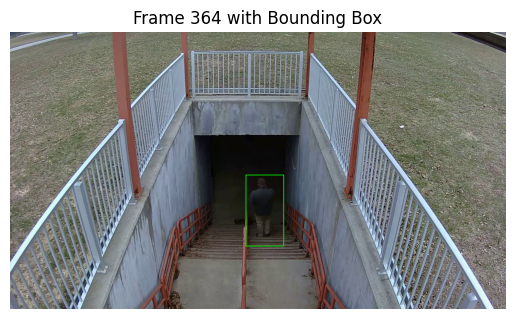

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-01.12-00-01.bus.G509_frange1422-1849.avi, Frame: 68, Bbox Area: 56140.00


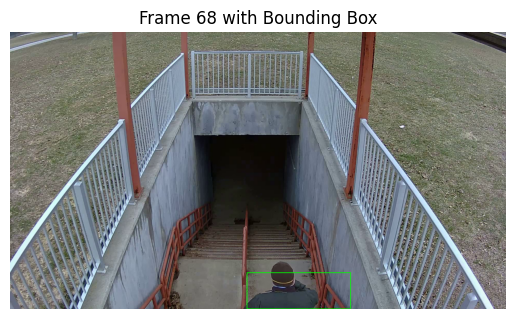

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-01.12-00-01.bus.G509_frange1422-1849.avi, Frame: 160, Bbox Area: 73416.00


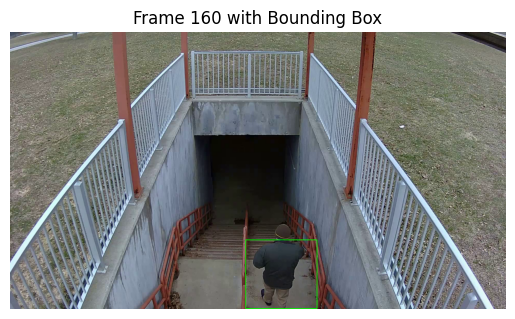

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-01.12-00-01.bus.G509_frange1422-1849.avi, Frame: 228, Bbox Area: 84672.00


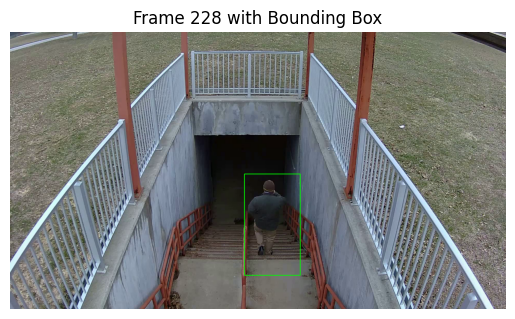

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-01.admin.G329_frange1471-1878.avi, Frame: 341, Bbox Area: 141128.00


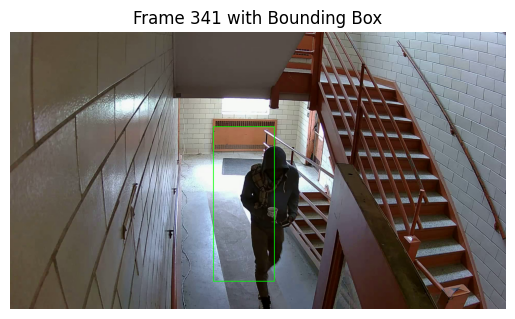

Video Path: data/MEVA/meva_processed/2018-03-11/12/2018-03-11.11-55-00.12-00-01.admin.G329_frange1471-1878.avi, Frame: 171, Bbox Area: 206266.00


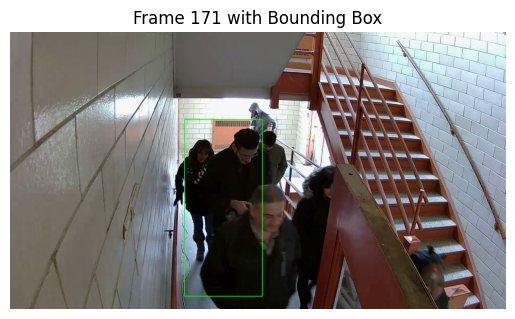

In [69]:
def plot_frame_with_bbox(video_path: str, frame_num: int, bbox_coords: tuple):
    """
    Plot a specific frame from the video with the bounding box.
    """
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_num >= total_frames:
        print(f"Frame {frame_num=} is out of range {total_frames=} in {video_path=}")
        cap.release()
        return
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    if not ret:
        print(f"Frame {frame_num} not found in {video_path}")
        return
    xmin, ymin, xmax, ymax = bbox_coords
    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {frame_num} with Bounding Box")
    plt.axis('off')
    plt.show()
    cap.release()

def show_video_frame_with_avg_bbox(annotations_df: pd.DataFrame, n=20):
    """
    Print video paths with average bounding box area for all tracks.
    Also, plot one frame with the bounding box for each video.
    """
    annotations_df['bbox_area'] = (annotations_df['xmax'] - annotations_df['xmin']) * \
                                  (annotations_df['ymax'] - annotations_df['ymin'])

    sorted_df = annotations_df.sort_values('bbox_area')

    step = max(1, len(sorted_df) // n)
    selected_indices = range(0, len(sorted_df), step)[:n]

    for idx in selected_indices:
        if idx >= len(sorted_df):
            continue
            
        row = sorted_df.iloc[idx]
        print(f"Video Path: {row['video_path']}, Frame: {row['keyframe_id']}, Bbox Area: {row['bbox_area']:.2f}")
        plot_frame_with_bbox(
            video_path=row['video_path'], 
            frame_num=row['keyframe_id'], 
            bbox_coords=(row['xmin'], row['ymin'], row['xmax'], row['ymax']))
        
show_video_frame_with_avg_bbox(annot_df)

In [70]:
def count_tracks_with_avg_bbox_area_less_than(annotations_df: pd.DataFrame, threshold=10000):
    """
    Count the number of videos where the average bounding box area per track is less than the threshold.
    """
    annotations_df['bbox_area'] = (annotations_df['xmax'] - annotations_df['xmin']) * \
                                  (annotations_df['ymax'] - annotations_df['ymin'])

    avg_track_box_area = annotations_df.groupby(['video_path', 'track_id'])['bbox_area'].mean().reset_index()

    videos_with_small_bbox = avg_track_box_area[avg_track_box_area['bbox_area'] < threshold]

    print(f"Number of videos with average bbox area per track < {threshold}: {len(videos_with_small_bbox)}/{len(avg_track_box_area)}")
    
count_tracks_with_avg_bbox_area_less_than(annot_df)

Number of videos with average bbox area per track < 10000: 0/11


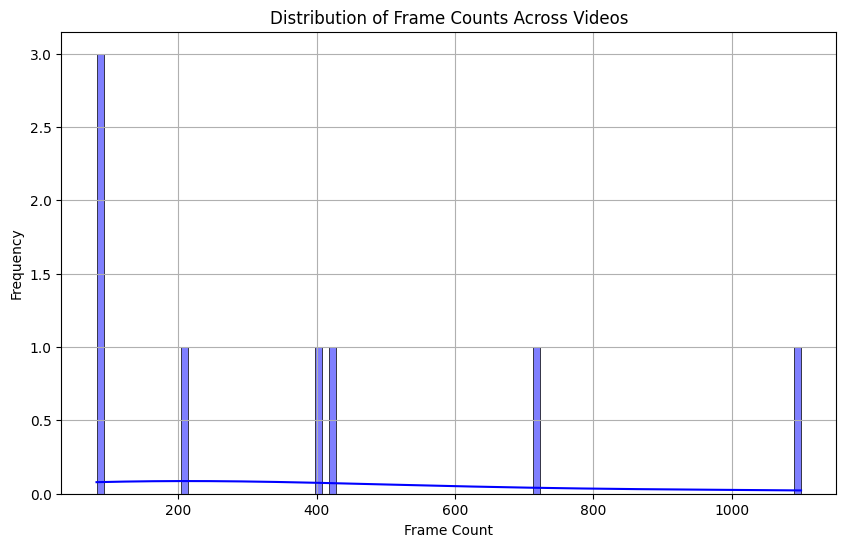

In [71]:
def plot_frame_count_distribution(annotations_df: pd.DataFrame):
    """
    Plot the distribution of frame counts across videos.
    """
    frame_counts = annotations_df.groupby('video_path')['keyframe_id'].max().reset_index()
    frame_counts.rename(columns={'keyframe_id': 'frame_count'}, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.histplot(frame_counts['frame_count'], bins=100, kde=True, color='blue')
    plt.title('Distribution of Frame Counts Across Videos')
    plt.xlabel('Frame Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_frame_count_distribution(annot_df)